In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv(r"mark_sheet_dataset.csv")

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1005 entries, 0 to 1004
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Student_ID     1005 non-null   object 
 1   Gender         1005 non-null   object 
 2   Math_Score     1004 non-null   float64
 3   English_Score  1004 non-null   float64
 4   Science_Score  1004 non-null   float64
 5   Attendance     1004 non-null   float64
dtypes: float64(4), object(2)
memory usage: 47.2+ KB


In [3]:
df.head()

,Student_ID,Gender,Math_Score,English_Score,Science_Score,Attendance
0,S1001,Female,79.967142,86.792265,72.598574,75.460962
1,S1002,Male,73.617357,81.095604,76.843851,80.698075
2,S1003,Female,81.476885,70.715564,71.660641,82.931972
3,S1004,Female,90.230299,62.236759,75.536308,94.438438
4,S1005,Female,72.658466,78.378680,62.851083,87.782766


In [4]:
df.columns

Index(['Student_ID', 'Gender', 'Math_Score', 'English_Score', 'Science_Score',
       'Attendance'],
      dtype='object')

In [5]:
df.describe()

,Math_Score,English_Score,Science_Score,Attendance
count,1004.000000,1004.000000,1004.000000,1004.000000
mean,75.219844,70.877752,78.021221,84.858825
std,10.058027,12.188226,8.141387,5.348865
min,30.000000,20.000000,25.000000,40.000000
25%,68.524097,62.725100,72.801361,81.233628
50%,75.264884,70.756926,77.951531,84.976378
75%,81.479439,78.824432,83.287323,88.334727
max,135.000000,125.000000,120.000000,101.215465


In [6]:
df.shape

(1005, 6)

In [7]:
df.isnull().sum()

Student_ID       0
Gender           0
Math_Score       1
English_Score    1
Science_Score    1
Attendance       1
dtype: int64

In [8]:
df["Math_Score"] = df["Math_Score"].fillna(df["Math_Score"].median())
df["English_Score"] = df["English_Score"].fillna(df["English_Score"].median())
df["Science_Score"] = df["Science_Score"].fillna(df["Science_Score"].median())
df["Attendance"] = df["Attendance"].fillna(df["Attendance"].median())

In [9]:
df.isnull().sum()

Student_ID       0
Gender           0
Math_Score       0
English_Score    0
Science_Score    0
Attendance       0
dtype: int64

In [10]:
df.duplicated().sum()

3

In [11]:
df = df.drop_duplicates()

In [12]:
df.duplicated().sum()

0

In [14]:
from matplotlib import pyplot as plt
import seaborn as sns

In [21]:
numeric_cols = df.select_dtypes(include="number").columns

Text(0.5, 1.0, 'Math_Score')

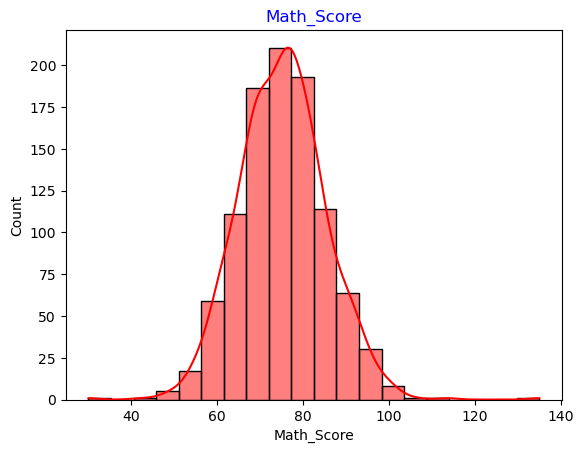

In [27]:
sns.histplot(df["Math_Score"],bins=20,kde=True,color = "red")
plt.title("Math_Score",color = "blue")

Text(0.5, 1.0, 'English_Score')

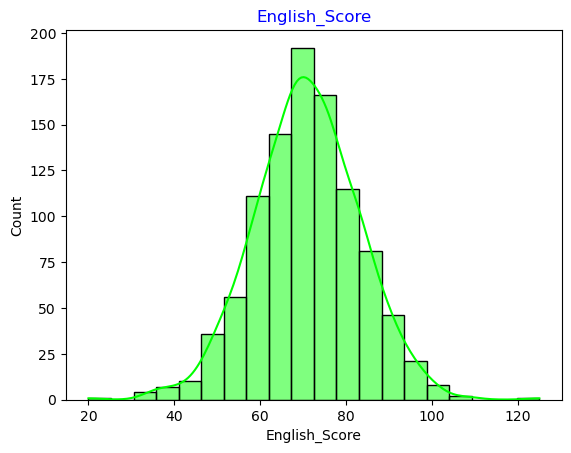

In [28]:
sns.histplot(df["English_Score"],bins=20,kde=True,color = "lime")
plt.title("English_Score",color = "blue")

Text(0.5, 1.0, 'Science_Score')

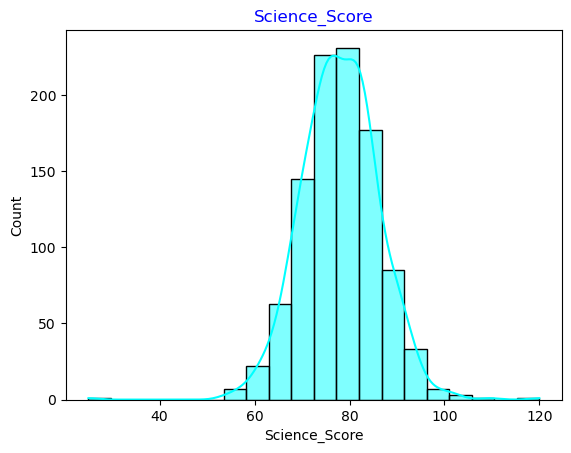

In [29]:
sns.histplot(df["Science_Score"],bins=20,kde=True,color = "cyan")
plt.title("Science_Score",color = "blue")

Text(0.5, 1.0, 'Attendance')

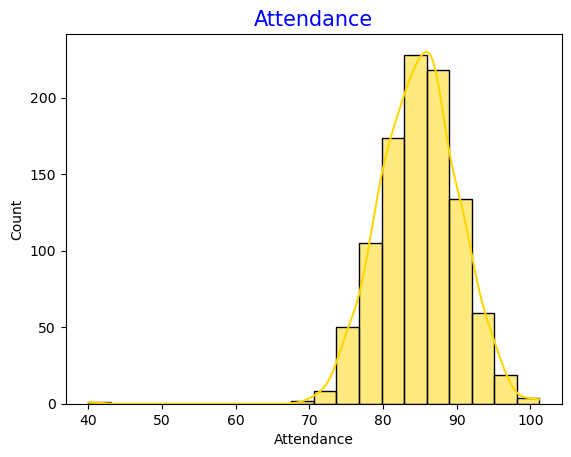

In [30]:
sns.histplot(df["Attendance"],bins=20,kde=True,color = "gold")
plt.title("Attendance",color = "blue",size = 15)

In [31]:
from scipy.stats import zscore
z_scores = df[['Math_Score', 'English_Score', 'Science_Score',
       'Attendance']].apply(zscore)

In [32]:
z_scores

,Math_Score,English_Score,Science_Score,Attendance
0,0.472833,1.308788,-0.667665,-1.762384
1,-0.158367,0.841067,-0.146201,-0.781891
2,0.622910,-0.011178,-0.782875,-0.363661
3,1.493043,-0.707325,-0.306812,1.790581
4,-0.253686,0.617996,-1.864988,0.544505
...,...,...,...,...
997,0.616105,-0.938798,-1.224430,-0.276316
998,-0.588706,-0.230591,0.324199,1.561883
999,0.548251,-0.803846,-0.156756,0.361118
1000,-4.494151,-4.175143,-6.514385,-8.401389


In [33]:
outliers = (z_scores < -3) | (z_scores > 3)
total_outliers=outliers.sum()

In [34]:
print(total_outliers)

Math_Score       5
English_Score    4
Science_Score    4
Attendance       2
dtype: int64


In [35]:
numeric_cols = ['Math_Score', 'English_Score', 'Science_Score','Attendance']
original_stats = {}

In [36]:
for col in numeric_cols:
    mean_val = df[col].mean()
    df[col] =df[col].fillna(mean_val)
    std_val = df[col].std()
    original_stats[col] = (mean_val,std_val)
    df[col] = df[col].clip(lower = mean_val - 3 * std_val , upper = mean_val + 3 * std_val)
    print(f"clipped values in {col}")
    

clipped values in Math_Score
clipped values in English_Score
clipped values in Science_Score
clipped values in Attendance


In [37]:
for col in numeric_cols:
    mean_val = df[col].mean()
    std_val = df[col].std()
    mean_val , std_val = original_stats[col]
    lower_bound = mean_val - 3 * std_val
    upper_bound = mean_val + 3 * std_val
    outliers_remaining = df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]
    if outliers_remaining == 0:
       print(f"outliers is {outliers_remaining} in {col}")
    else:
        print("outliers are there")
    

outliers is 0 in Math_Score
outliers is 0 in English_Score
outliers is 0 in Science_Score
outliers is 0 in Attendance


In [38]:
for col in numeric_cols:
    mean_val , std_val = original_stats[col]
    lower_bound = mean_val - 3 * std_val
    upper_bound = mean_val + 3 * std_val
    outliers_remaining = df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]
    print(f"outliers is {outliers_remaining} in {col}")
    

outliers is 0 in Math_Score
outliers is 0 in English_Score
outliers is 0 in Science_Score
outliers is 0 in Attendance


In [39]:
df

,Student_ID,Gender,Math_Score,English_Score,Science_Score,Attendance
0,S1001,Female,79.967142,86.792265,72.598574,75.460962
1,S1002,Male,73.617357,81.095604,76.843851,80.698075
2,S1003,Female,81.476885,70.715564,71.660641,82.931972
3,S1004,Female,90.230299,62.236759,75.536308,94.438438
4,S1005,Female,72.658466,78.378680,62.851083,87.782766
...,...,...,...,...,...,...
997,S1998,Female,81.408429,59.417504,68.065915,83.398511
998,S1999,Male,69.288210,68.043196,80.673411,93.216891
999,S2000,Female,80.725828,61.061168,76.757928,86.803239
1000,S2001,Male,45.015874,34.294567,53.598671,68.842475


In [40]:
df[df.isnull().any(axis=1)]

,Student_ID,Gender,Math_Score,English_Score,Science_Score,Attendance


In [41]:
df[df['Math_Score'].isnull()]

,Student_ID,Gender,Math_Score,English_Score,Science_Score,Attendance


In [42]:
df[df['English_Score'].isnull()]

,Student_ID,Gender,Math_Score,English_Score,Science_Score,Attendance


In [43]:
df[df['Science_Score'].isnull()]

,Student_ID,Gender,Math_Score,English_Score,Science_Score,Attendance


In [44]:
df[df['Attendance'].isnull()]

,Student_ID,Gender,Math_Score,English_Score,Science_Score,Attendance


In [45]:
missing_indices = df[df.isnull().any(axis=1)].index

In [46]:
missing_indices

Index([], dtype='int64')

In [47]:
df.isnull().sum()

Student_ID       0
Gender           0
Math_Score       0
English_Score    0
Science_Score    0
Attendance       0
dtype: int64

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1002 entries, 0 to 1001
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Student_ID     1002 non-null   object 
 1   Gender         1002 non-null   object 
 2   Math_Score     1002 non-null   float64
 3   English_Score  1002 non-null   float64
 4   Science_Score  1002 non-null   float64
 5   Attendance     1002 non-null   float64
dtypes: float64(4), object(2)
memory usage: 54.8+ KB


In [75]:
df[df.isnull().any(axis=1)]

,Student_ID,Gender,Math_Score,English_Score,Science_Score,Attendance


In [77]:
df

,Student_ID,Gender,Math_Score,English_Score,Science_Score,Attendance
0,S1001,Female,79.967142,86.792265,72.598574,75.460962
1,S1002,Male,73.617357,81.095604,76.843851,80.698075
2,S1003,Female,81.476885,70.715564,71.660641,82.931972
3,S1004,Female,90.230299,62.236759,75.536308,94.438438
4,S1005,Female,72.658466,78.378680,62.851083,87.782766
...,...,...,...,...,...,...
997,S1998,Female,81.408429,59.417504,68.065915,83.398511
998,S1999,Male,69.288210,68.043196,80.673411,93.216891
999,S2000,Female,80.725828,61.061168,76.757928,86.803239
1000,S2001,Male,45.015874,34.294567,53.598671,68.842475


In [79]:
numeric_cols = df.select_dtypes(include="number").columns

In [81]:
df

,Student_ID,Gender,Math_Score,English_Score,Science_Score,Attendance
0,S1001,Female,79.967142,86.792265,72.598574,75.460962
1,S1002,Male,73.617357,81.095604,76.843851,80.698075
2,S1003,Female,81.476885,70.715564,71.660641,82.931972
3,S1004,Female,90.230299,62.236759,75.536308,94.438438
4,S1005,Female,72.658466,78.378680,62.851083,87.782766
...,...,...,...,...,...,...
997,S1998,Female,81.408429,59.417504,68.065915,83.398511
998,S1999,Male,69.288210,68.043196,80.673411,93.216891
999,S2000,Female,80.725828,61.061168,76.757928,86.803239
1000,S2001,Male,45.015874,34.294567,53.598671,68.842475


In [83]:
df_numeric = df.select_dtypes(include=['number'])
df_numeric.corr()

,Math_Score,English_Score,Science_Score,Attendance
Math_Score,1.000000,-0.022312,0.040648,0.004904
English_Score,-0.022312,1.000000,0.008019,-0.036366
Science_Score,0.040648,0.008019,1.000000,0.037738
Attendance,0.004904,-0.036366,0.037738,1.000000


In [85]:
#df.drp("Student_ID",axis=1,inplace = True)
#df.drp("Gender",axis=1,inplace = True)
dff = df[["Math_Score","English_Score","Science_Score","Attendance"]]

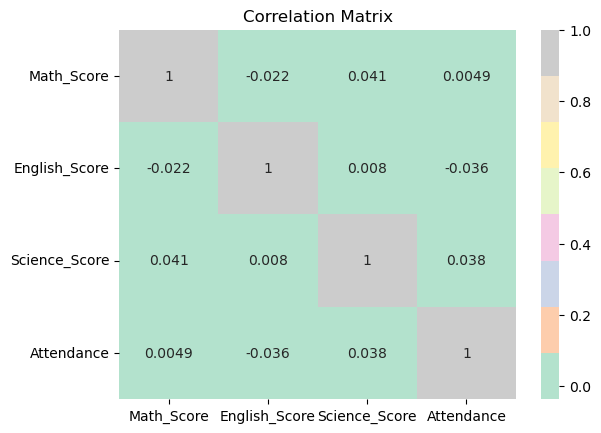

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = dff.corr()
sns.heatmap(corr_matrix, annot=True, cmap='Pastel2')
plt.title("Correlation Matrix")
plt.show()

In [88]:
corr_matrix

,Math_Score,English_Score,Science_Score,Attendance
Math_Score,1.000000,-0.022312,0.040648,0.004904
English_Score,-0.022312,1.000000,0.008019,-0.036366
Science_Score,0.040648,0.008019,1.000000,0.037738
Attendance,0.004904,-0.036366,0.037738,1.000000


<Figure size 1200x1400 with 0 Axes>

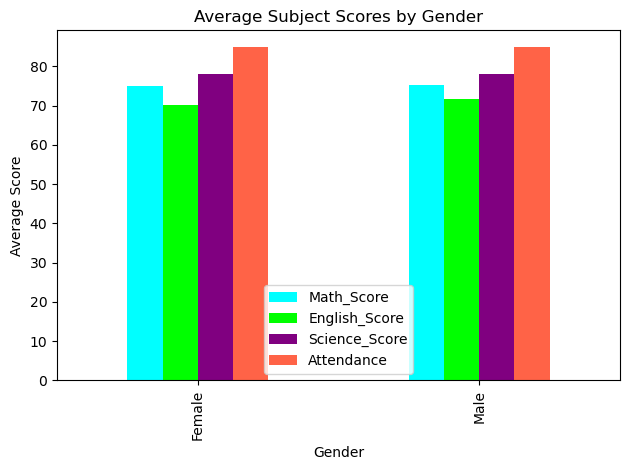

In [89]:
colors = ["cyan","lime","purple","tomato"]
plt.figure(figsize=(12,14 ))
avg_scores_by_gender = df.groupby("Gender")[["Math_Score", "English_Score", "Science_Score","Attendance"]].mean().reset_index()
avg_scores_by_gender.set_index("Gender").plot(kind='bar',color=colors)
plt.title("Average Subject Scores by Gender") 
plt.ylabel("Average Score")
plt.tight_layout()
plt.show()

In [90]:
avg_scores_by_gender

,Gender,Math_Score,English_Score,Science_Score,Attendance
0,Female,75.061776,70.051184,77.950153,84.951388
1,Male,75.319549,71.652954,78.126497,84.853775


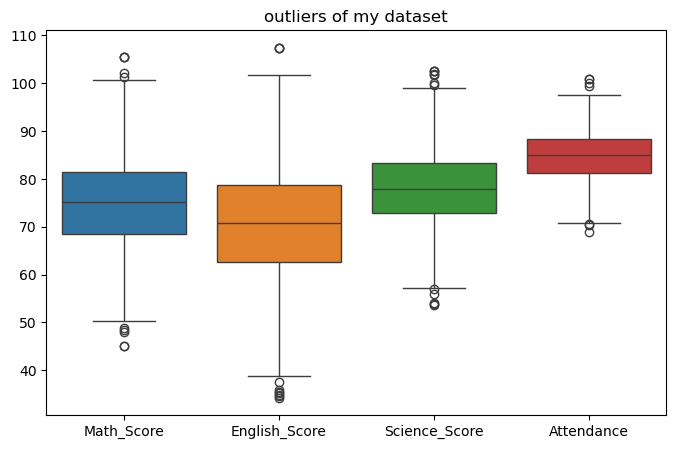

In [93]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df)
plt.title("outliers of my dataset")
plt.show()

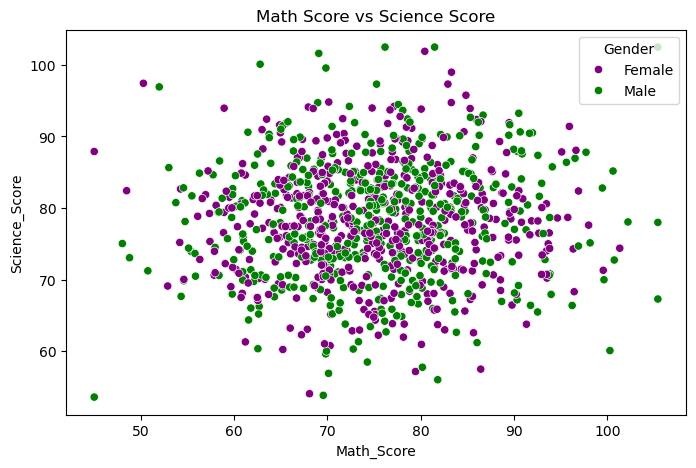

In [94]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Math_Score', y='Science_Score', hue='Gender',palette=["purple", "green"])
plt.title("Math Score vs Science Score")
plt.show()

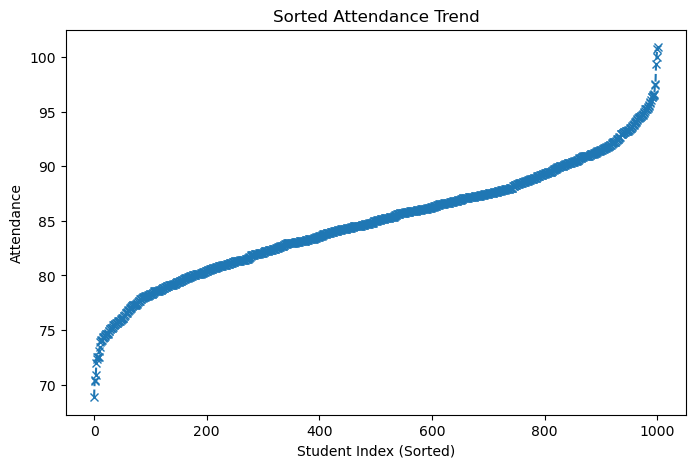

In [95]:
plt.figure(figsize=(8, 5))
df_sorted = df.sort_values(by='Attendance')
plt.plot(df_sorted['Attendance'].values, marker='x', linestyle='--')
plt.title("Sorted Attendance Trend")
plt.xlabel("Student Index (Sorted)")
plt.ylabel("Attendance")
plt.show()

In [98]:
df.to_csv("Marksheet_dataset_cleaned.csv", index = False)